# K-means: California housing

## Notebook set-up

In [3]:
# Standard library imports
from pathlib import Path

# Core data science libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Custom helper functions for visualization and analysis
import functions as funcs

RANDOM_SEED=315

## 1. Data loading
### 1.1. Load data from URL

In [4]:
# URL to the wine quality dataset from the project tutorial repository
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

# Load the CSV data directly from URL
data_df = pd.read_csv(url)

### 1.2. Save a local copy

In [5]:

# Create directory structure for raw data storage
Path('../data/raw').mkdir(exist_ok=True, parents=True)

# Save a local copy of the raw data in Parquet format for efficient storage
data_df.to_parquet('../data/raw/housing.parquet')

### 1.3. Inspect

Now that we've loaded the data, let's examine its structure and content to understand what we're working with. This initial inspection will help us identify the features, data types, and any potential data quality issues.

In [6]:
data_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 1.4. Remove unnecessary features

In [8]:
# Select only location and median income as describe in the assignment instructions
data_df = data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


## 2. EDA
### 2.1. Feature distributions

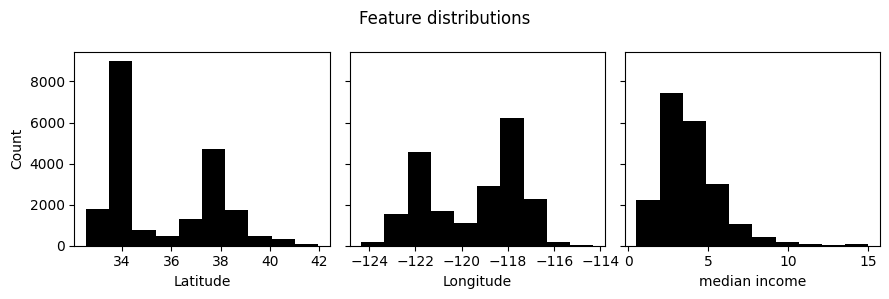

In [9]:
fig, ax=plt.subplots(1, 3, figsize=(9, 3), sharey=True)

fig.suptitle('Feature distributions')

ax[0].set_ylabel('Count')

ax[0].hist(data_df['Latitude'], color='black')
ax[0].set_xlabel('Latitude')

ax[1].hist(data_df['Longitude'], color='black')
ax[1].set_xlabel('Longitude')

ax[2].hist(data_df['MedInc'], color='black')
ax[2].set_xlabel('median income')

fig.tight_layout()
fig.show()

### 2.2. Feature correlations

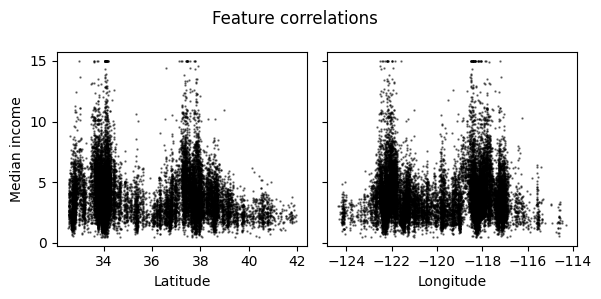

In [10]:
fig, ax=plt.subplots(1, 2, figsize=(6, 3), sharey=True)

fig.suptitle('Feature correlations')

ax[0].set_ylabel('Median income')

ax[0].scatter(data_df['Latitude'], data_df['MedInc'], color='black', s=0.5, alpha=0.5)
ax[0].set_xlabel('Latitude')

ax[1].scatter(data_df['Longitude'], data_df['MedInc'], color='black', s=0.5, alpha=0.5)
ax[1].set_xlabel('Longitude')

fig.tight_layout()
fig.show()

## 3. Data preparation

### 3.1. Train-test split

In [11]:
training_df, testing_df = train_test_split(
    data_df,
    test_size=0.3,
    random_state=RANDOM_SEED
)

### 3.2. Feature scaling

In [12]:
scaler = MinMaxScaler()

scaled_training_data = scaler.fit_transform(training_df)
training_df = pd.DataFrame(scaled_training_data, columns=scaler.get_feature_names_out())

scaled_testing_data = scaler.transform(testing_df)
testing_df = pd.DataFrame(scaled_testing_data, columns=scaler.get_feature_names_out())

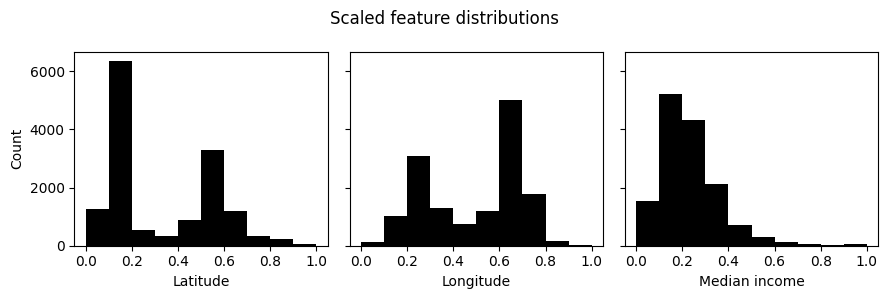

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

fig.suptitle('Scaled feature distributions')

ax[0].set_ylabel('Count')

ax[0].hist(training_df['Latitude'], color='black')
ax[0].set_xlabel('Latitude')

ax[1].hist(training_df['Longitude'], color='black')
ax[1].set_xlabel('Longitude')

ax[2].hist(training_df['MedInc'], color='black')
ax[2].set_xlabel('Median income')

plt.tight_layout()
plt.show()

## 4. Clustering

### 4.1. Find clusters

In [14]:
kmeans_model = KMeans(n_clusters=6, n_init='auto', random_state=RANDOM_SEED)
kemans_fit_result = kmeans_model.fit(training_df)

### 4.2. Add cluster label to training data

In [15]:
training_df['cluster'] = list(kmeans_model.labels_)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     14448 non-null  float64
 1   Latitude   14448 non-null  float64
 2   Longitude  14448 non-null  float64
 3   cluster    14448 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 395.2 KB


### 3.3. Plot results

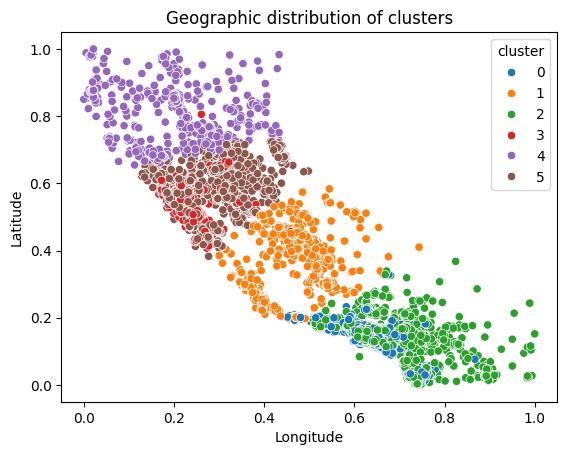

In [16]:
plt.title('Geographic distribution of clusters')
sns.scatterplot(data=training_df, x='Longitude', y='Latitude', hue='cluster', palette='tab10')
plt.show()

In [26]:
fig = px.scatter_3d(
    training_df,
    x='Longitude',
    y='Latitude',
    z='MedInc',
    color='cluster',
    width=800,
    height=800,
)

fig.update_traces(marker_size=1)

camera = dict(
    up=dict(x=0, y=0, z=1),
    eye=dict(x=-0.22167202369427083, y=-1.3611599628391098, z=1.6690132023070159)
)

fig.update_layout(scene_camera=camera)
fig.show()

## 5. Supervised classification model
### 5.1. Features & labels

In [27]:
labels = training_df['cluster'].reset_index(drop=True)
features = training_df.drop('cluster', axis=1).reset_index(drop=True)
features.head()

MedInc  Latitude  Longitude
0  0.000000  0.731137   0.148073
1  0.261086  0.558980   0.193712
2  0.285175  0.549416   0.232252
3  0.045986  0.167906   0.713996
4  0.473897  0.171095   0.627789

In [28]:
print(list(labels[:10]))

[4, 5, 5, 2, 0, 2, 5, 5, 2, 3]


### 5.2. Model training

In [29]:
classification_model = GradientBoostingClassifier(random_state=RANDOM_SEED)
fit_result = classification_model.fit(features, labels)

### 5.3. Cross-validation

In [30]:
scores = funcs.cross_val(classification_model, features, labels)

Cross-validation accuracy: 99.36 +/- 0.19%


### 5.4. Model evaluation

In [32]:
testing_predictions = classification_model.predict(testing_df)
testing_labels = list(kmeans_model.predict(testing_df))
result = accuracy_score(testing_labels, testing_predictions)

print(f'Supervised model is {result*100:.1f}% accurate on the held-out test data.')

Supervised model is 99.4% accurate on the held-out test data.


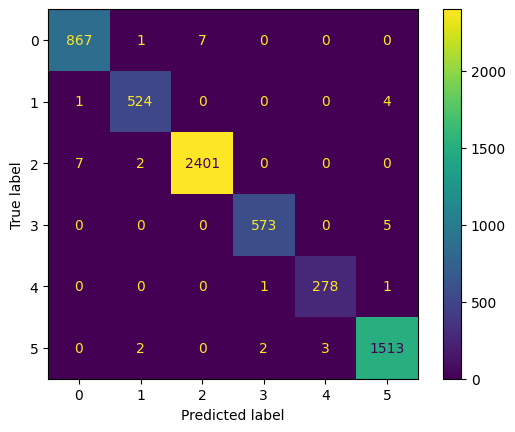

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_estimator(classification_model, testing_df, testing_labels)